# Projet stat 1

##### Importation 

In [64]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
# Data reading
data_path='/Users/qtngr/Desktop/Centrale/MATHAPP/APP_STAT/PROJET/POMPIERS/'
x_train = pd.read_csv(data_path+'x_train.csv', sep=',')
y_train = pd.read_csv(data_path+'y_train.csv', sep=',')
x_test = pd.read_csv(data_path+'x_test.csv', sep=',')

x_train_transit = x_train[['OSRM estimated distance','intervention on public roads','floor']]
y_train_transit = y_train[['delta departure-presentation']]
x_test_transit = x_test[['OSRM estimated distance','intervention on public roads','floor']]

In [7]:
# Create a predictive model for the 'delta departure-presentation'
# based on 'OSRM estimated distance', 'intervention on public roads' and 'floor'
polynomial_features= PolynomialFeatures(degree=3)
x_train_transit_poly = polynomial_features.fit_transform(x_train_transit)
model = LinearRegression()
model.fit(x_train_transit_poly, y_train_transit)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Prediction of the 'delta selection-presentation'
x_test_transit_poly = polynomial_features.fit_transform(x_test_transit)
y_selection_presentation_predicted = y_train['delta selection-departure'].median() + model.predict(x_test_transit_poly)

In [19]:
# Create a submission file
submission = pd.concat([pd.DataFrame(x_test[['emergency vehicle selection']].values), \
           pd.DataFrame(np.full((len(x_test), 1), y_train['delta selection-departure'].median())), \
           pd.DataFrame(model.predict(x_test_transit_poly)), \
           pd.DataFrame(y_selection_presentation_predicted)], \
           axis=1)

submission.columns = list(y_train.columns.values)

submission.set_index('emergency vehicle selection', inplace=True)

submission.to_csv('./submission.csv', sep=",")


# Affichage résultats

[]

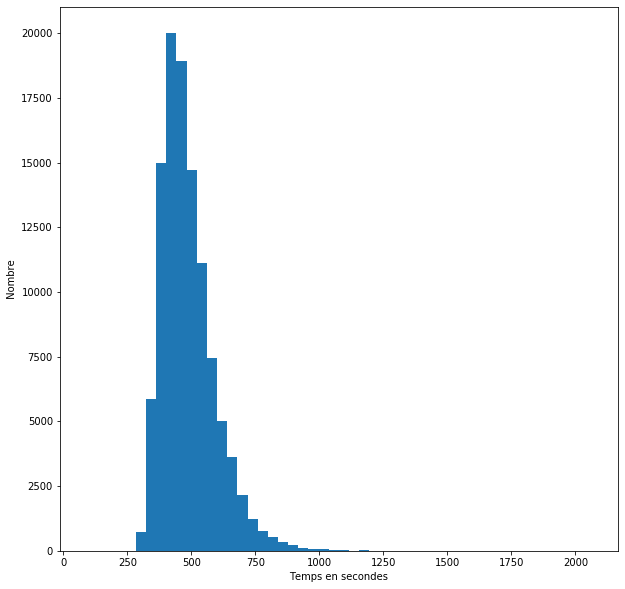

In [36]:
f, ax = plt.subplots(figsize=(10,10))
plt.hist(y_selection_presentation_predicted, bins=50)
plt.xlabel('Temps en secondes')
plt.ylabel(' Nombre ')
plt.plot()

# Évaluation de la précision du modèle (absence de y_test):

On va utiliser train_test_split pour se former une partie apprentissage et une autre de test.

In [59]:
X_train, X_test, Y_train, Y_test=train_test_split(x_train_transit, y_train_transit, test_size=0.30)

X_train_transit_poly = polynomial_features.fit_transform(X_train)
model.fit(X_train_transit_poly, Y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:

X_test_transit_poly = polynomial_features.fit_transform(X_test)
Y_selection_presentation_predicted = y_train['delta selection-departure'].median() + model.predict(X_test_transit_poly)


In [61]:
r2_score(Y_test,Y_selection_presentation_predicted)

-0.12749727816726097

### La valeur négative s'explique par: 

"𝑅2 compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis). If the chosen model fits worse than a horizontal line, then 𝑅2 is negative. Note that 𝑅2 is not always the square of anything, so it can have a negative value without violating any rules of math. 𝑅2 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line."

[]

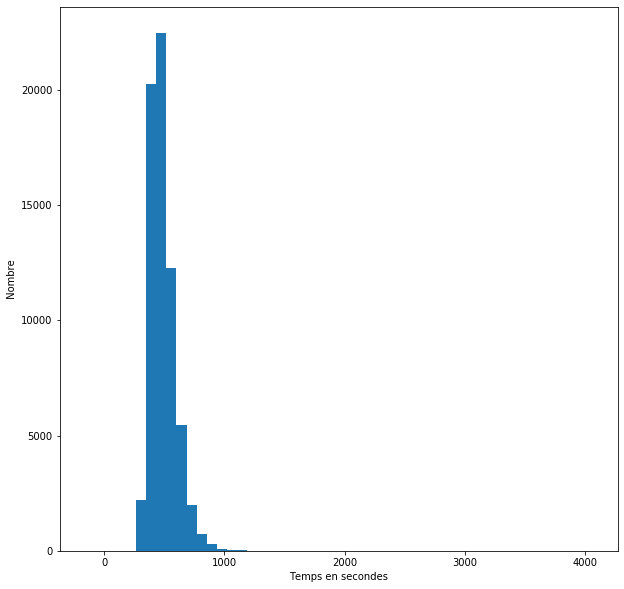

In [63]:
f, ax = plt.subplots(figsize=(10,10))
plt.hist(Y_selection_presentation_predicted, bins=50)
plt.xlabel('Temps en secondes')
plt.ylabel(' Nombre ')
plt.plot()

## Test d'une nouvelle méthode: Le Lasso

In [70]:
model_lasso=Lasso(alpha=0.1)
model_lasso.fit(X_train,Y_train)
Y_pred=model_lasso.predict(X_test)

Y_test = np.array(Y_test).flatten()

In [94]:
r2_score(Y_test,Y_pred)

0.1964031637548379